## Problem Statement.
- The objective of this project was to develop a machine learning model capable of classifying facial expressions in images into one of seven emotion categories: anger, disgust, fear, happiness, sadness, surprise, and neutral.

## Importing Necessary Libraries

In [1]:
# To extract from zipfile.
import os
from zipfile import ZipFile

# for Image processing
from PIL import Image
import matplotlib.pyplot as plt

# for dataframe manipulation and analysis
import pandas as pd
import numpy as np

# for data preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

# for model building
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Extracting files from zipfile

In [2]:
file_name = 'expression_images_dataset.zip'
destination_path = 'expression_dataset'

with ZipFile(file_name,'r') as zip:
    print('extracting all the files')
        
    if (not os.path.exists(destination_path)):
        zip.extractall(path = destination_path)
        print('done')
    else:
        print('destination path already exists')

extracting all the files
destination path already exists


#### Observation
- The files were extracted and stored in expression_dataset folder.
- This folder had images and a csv file.

## Loading dataset

- Loading the csv file

In [3]:
df = pd.read_csv('expression_dataset/data.csv')
df.head()

,filepath,student,facial_expression
0,images/KA.AN1.39.tiff,KA,angry
1,images/KA.AN2.40.tiff,KA,angry
2,images/KA.AN3.41.tiff,KA,angry
3,images/KA.DI1.42.tiff,KA,disgust
4,images/KA.DI2.43.tiff,KA,disgust


#### About the dataset
The dataset has 
- filepath : path of the image
- student: for which facial expression has been recorded.
- facial_expression : facial expression of the student.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   filepath           213 non-null    object
 1   student            192 non-null    object
 2   facial_expression  213 non-null    object
dtypes: object(3)
memory usage: 5.1+ KB


#### Observation
- There are 213 records and 3 features.
- Student feature has missing values,but for this task the feature is not required.

## Data Preprocessing

### Encoding the Target variable

In [5]:
le = LabelEncoder()
y = le.fit_transform(df['facial_expression'])

### Feature Extraction

- Converting Image to Numerical form.

In [6]:
x = []
for i in range(len(df)):
    path = 'expression_dataset/' + df.iloc[i][0]
    im = Image.open(path)
    imarray = np.array(im).reshape(-1)
    x.append(imarray)

### Train test split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

### Feature Scaling

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model building

### Model training using SVM

In [9]:
svc = LinearSVC()
svc.fit(x_train,y_train)

LinearSVC()

In [10]:
# model evaluation
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

# printing scores                    
print("Accuracy:", round(accuracy,4))
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n",report)

Accuracy: 0.9767
Confusion Matrix:
 [[6 0 0 0 0 0 0]
 [0 4 1 0 0 0 0]
 [0 0 6 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 7 0 0]
 [0 0 0 0 0 6 0]
 [0 0 0 0 0 0 5]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.80      0.89         5
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.97        43
weighted avg       0.98      0.98      0.98        43



## Conclusion
- The model has high accuracy of 97.67%, indicating its ability to correctly classify the majority of images.

### Prediction on new data

In [11]:
def image_predictor(filename):
    path_new = 'expression_dataset/images/'+ filename
    im_new = Image.open(path_new)
    imarray_new = np.array(im_new).reshape(-1)
    x_new = scaler.transform([imarray_new])
    pred = svc.predict(x_new)
    print(le.inverse_transform(pred)[0])    

In [12]:
image_predictor('KA.HA2.30.tiff')

happiness


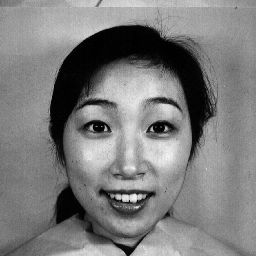

In [13]:
Image.open('expression_dataset/images/KA.HA2.30.tiff')